In [1]:
import sys
import itertools

import numpy as np
import pandas as pd
import scipy.signal
from scipy.signal import savgol_filter
from scipy.stats import zscore
from tqdm import tqdm

import neuroseries as nts


import time
import matplotlib.pyplot as plt

import seaborn as sns 
import bk.load
import bk.compute
import bk.plot

import os

plt.rcParams['svg.fonttype'] = 'none'

In [34]:
bk.load.current_session_linux()
states = bk.load.states()
# chan = bk.load.bla_channels()['right']
# chan = bk.load.ripple_channel()

Sxxs = []
for s,e in tqdm(states['sws'].as_units('s').iloc,total = len(states['sws'])):
    lfp = bk.load.lfp(chan,s,e)
    f, t ,Sxx=scipy.signal.spectrogram(lfp.values,1250,nperseg=5000,noverlap=2500)
    Sxx = scipy.signal.resample(Sxx,60,axis = 1)
    Sxxs.append(Sxx)



Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713


100%|██████████| 34/34 [00:56<00:00,  1.66s/it]


/tmp/ipykernel_1619243/2589298797.py:2: RuntimeWarning: invalid value encountered in log
  plt.pcolor(range(average_Sxx.shape[1]),f,np.log(average_Sxx))
/tmp/ipykernel_1619243/2589298797.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(range(average_Sxx.shape[1]),f,np.log(average_Sxx))


(0.0, 30.0)

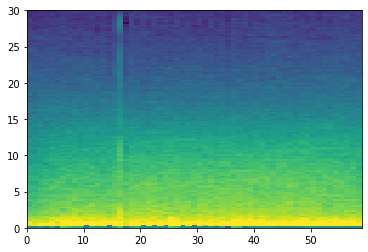

In [36]:
average_Sxx = np.nanmean(Sxxs,0)
plt.pcolor(range(average_Sxx.shape[1]),f,np.log(average_Sxx))
plt.clim(1,7.5)
plt.ylim(0,30)

In [6]:
Sxxs[0].shape

(2501, 30)

In [11]:
average_Sxx.shape

(2501, 30)

In [13]:
f.shape

(2501,)

/tmp/ipykernel_1619243/158730612.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(range(average_Sxx.shape[1]),f,np.log(average_Sxx))


(0.0, 20.0)

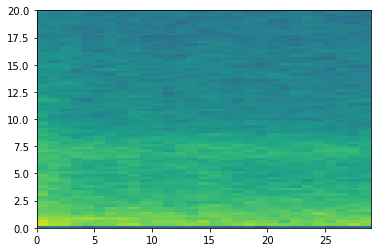